<a href="https://colab.research.google.com/github/Bosy-Ayman/DataGovernance/blob/main/Phase2_(cleaning%2Cvalidation%2Cencryption).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

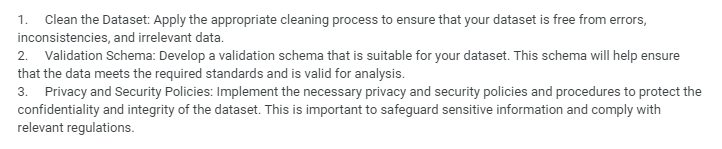

In [461]:
import pandas as pd

In [462]:
df = pd.read_csv('/content/googleplaystore.csv')

In [463]:
df.head()

  and should_run_async(code)



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#Issue:


*   There are 5 columns that has null values (Rating, current version, Android version, Type, content rating)
*   There is exists duplicated values.


*   There are column is not integer. (it’s hard to explore the data from an object data type)


In [464]:
df.describe()

  and should_run_async(code)



,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [465]:
df.info()

  and should_run_async(code)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [466]:
#identify duplicate rows
df.duplicated().sum()

  and should_run_async(code)



483

In [467]:
#identify duplicate rows
duplicate = df[df.duplicated()]
duplicate

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [468]:
missing_values_count = df.isnull().sum()

missing_values_count[:]

  and should_run_async(code)



App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# **Clean Data**


#**Fill missing values**

In [469]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)
df['Rating']

0        4.100000
1        3.900000
2        4.700000
3        4.500000
4        4.300000
           ...   
10836    4.500000
10837    5.000000
10838    4.193338
10839    4.500000
10840    4.500000
Name: Rating, Length: 10841, dtype: float64

In [470]:
df['Android Ver'].fillna('NA',inplace=True)


In [471]:
df['Current Ver'].fillna('NA',inplace=True)

#Drop Null values

In [472]:
df.dropna(inplace = True)

In [473]:
missing_values_count = df.isnull().sum()

missing_values_count[:]

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#**Drop Duplicates**

In [474]:
df.duplicated().sum()


483

In [475]:
df.drop_duplicates(inplace = True)

In [476]:
df.duplicated().sum()

0

In [477]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10356 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10356 non-null  object 
 1   Category        10356 non-null  object 
 2   Rating          10356 non-null  float64
 3   Reviews         10356 non-null  object 
 4   Size            10356 non-null  object 
 5   Installs        10356 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10356 non-null  object 
 8   Content Rating  10356 non-null  object 
 9   Genres          10356 non-null  object 
 10  Last Updated    10356 non-null  object 
 11  Current Ver     10356 non-null  object 
 12  Android Ver     10356 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#Change Data Type & Remove Strips

In [478]:
def strip_cols(col_name):
    col_name = col_name.str.replace('$', '')
    col_name = col_name.str.replace('+', '')
    col_name = col_name.str.replace(',', '')
    col_name = col_name.str.replace('M', 'e+6')
    col_name = col_name.str.replace('k', 'e+3')
    col_name = col_name.str.replace('Varies with device', '0')
    col_name = col_name.str.replace('Free', '0')
    col_name = col_name.str.replace('Everyone', '0')
    col_name = col_name.str.replace(' and up', '')

    return col_name

def change_intdtype(col_name):
    col_name=col_name.astype('int64')
    return col_name
def change_dtype(col_name):
    col_name=col_name.astype('float')
    return col_name


  and should_run_async(code)



In [479]:
df.columns = df.columns.str.replace(" ","_")


  and should_run_async(code)



#Price column

In [480]:
df['Price'] = strip_cols(df['Price'])
df['Price'] = change_dtype(df['Price'])

In [481]:
df['Price']

  and should_run_async(code)



0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10356, dtype: float64

Text(0.5, 1.0, 'Price column ')

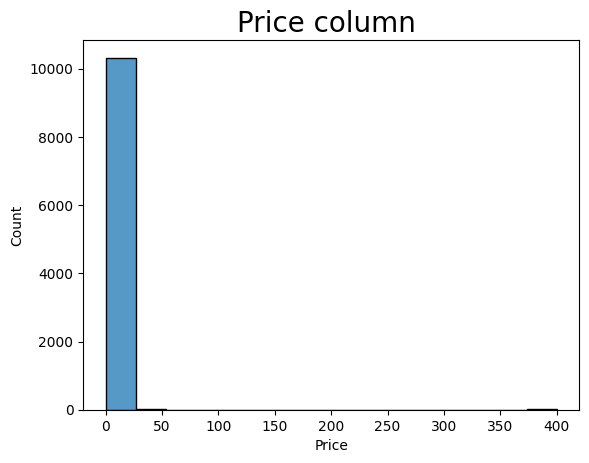

In [482]:
sns.histplot(df["Price"])
plt.title("Price column ", size=20,)

  and should_run_async(code)



#Rating Column

Text(0.5, 1.0, 'Histogram with the kde for the rating column ')

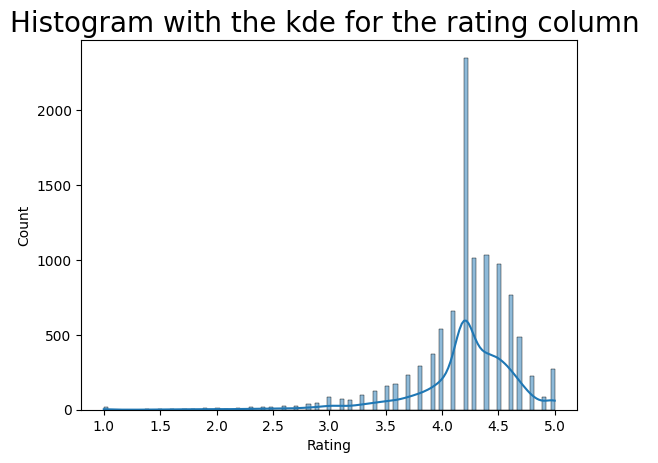

In [543]:
sns.histplot(df["Rating"], kde = True)
plt.title("Histogram with the kde for the rating column ", size=20,)

# **Installs Column**

In [484]:
df.Installs = df.Installs.apply(lambda x:x.replace("+",""))
df.Installs = df.Installs.apply(lambda x:x.replace(",",""))
df.Installs = df.Installs.apply(lambda x:int(x))

  and should_run_async(code)



In [485]:
df['Installs']

  and should_run_async(code)



0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10356, dtype: int64

  and should_run_async(code)



*need to be scaled*

In [486]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

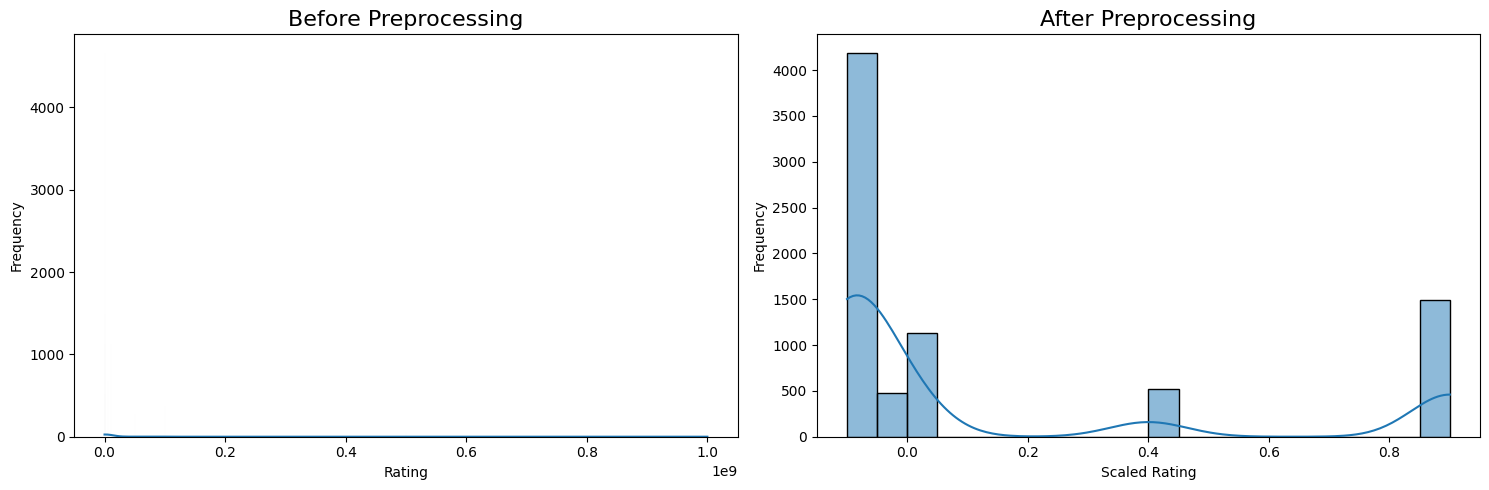

In [522]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the original histogram with KDE
sns.histplot(df["Installs"], kde=True, ax=axes[0])
axes[0].set_title("Before Preprocessing", size=16)
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Frequency")

# Remove outliers and apply Robust scaling
scaler = RobustScaler()
df["Rating_scaled"] = scaler.fit_transform(df[["Installs"]])
df_processed = df[(df["Rating_scaled"] >= -3) & (df["Rating_scaled"] <= 3)]

# Plot the histogram with KDE after preprocessing
sns.histplot(df_processed["Rating_scaled"], kde=True, ax=axes[1])
axes[1].set_title("After Preprocessing", size=16)
axes[1].set_xlabel("Scaled Rating")
axes[1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


  and should_run_async(code)



#**Size Column**

In [488]:
df["Size"].replace("M","", regex=True, inplace = True)
df["Size"].replace("k","", regex=True, inplace = True)

In [489]:
df["Size"].unique()


array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '7.0', '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '201', '3.6', '5.7', '8.6', '2.4', '27',
       '2.5', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4', '18',
       '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1',
       '3.7', '22', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9', '9.5',
       '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2', '2.1',
       '42', '7.3', '9.1', '55', '6.5', '1.5', '7.5', '51', '41', '48',
       '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8', '8.8', '6.6',
       '5.1', '61', '66', '79', '8.4', '118', '44', '695', '1.6', '6.2',
       '53', '1.4', '3.0', '5.8', '3.8', '9.6', '45', '63', '49', '77',
       '4.4', '4.8', '70', '6.9', '9.3', '10.0', '8.1', '36',

In [490]:
size_median = df[df["Size"]!="Varies with device"]["Size"].astype(float).median()
size_median

14.0

In [491]:
df["Size"].replace("Varies with device", size_median, inplace=True)


  and should_run_async(code)



In [492]:
df['Size']

0          19
1          14
2         8.7
3          25
4         2.8
         ... 
10836      53
10837     3.6
10838     9.5
10839    14.0
10840      19
Name: Size, Length: 10356, dtype: object

In [493]:
df.Size.describe().round()

count     10356.0
unique      422.0
top          14.0
freq       1525.0
Name: Size, dtype: float64

In [494]:
df.Size = pd.to_numeric(df.Size)


  and should_run_async(code)



Text(0.5, 1.0, 'Size column ')

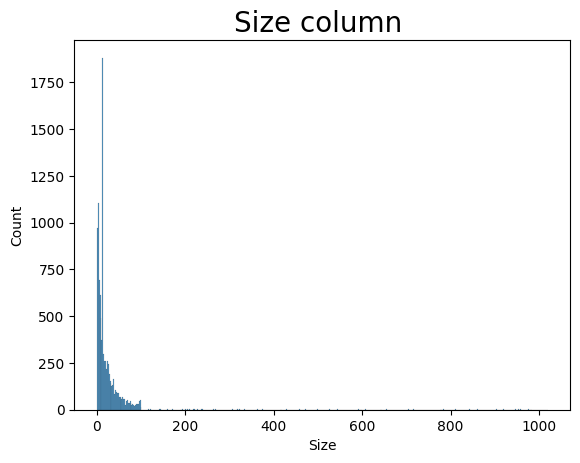

In [495]:
sns.histplot(df["Size"])
plt.title("Size column ", size=20,)

 ***Need to be scaled***

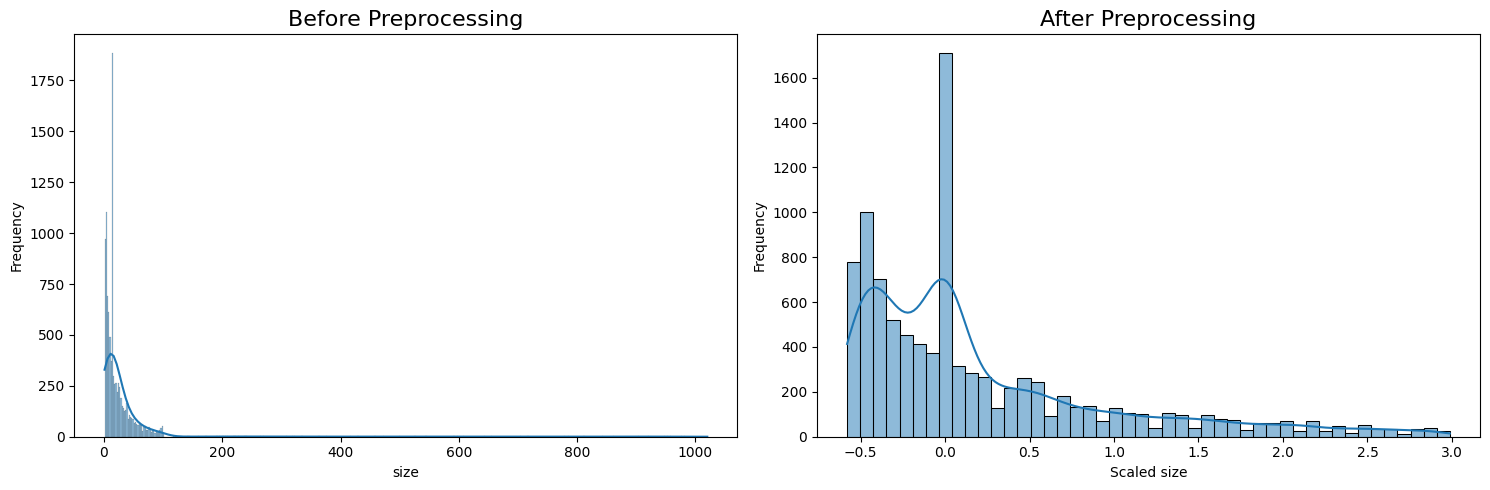

In [544]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the original histogram with KDE
sns.histplot(df["Size"], kde=True, ax=axes[0])
axes[0].set_title("Before Preprocessing", size=16)
axes[0].set_xlabel("size")
axes[0].set_ylabel("Frequency")

# Remove outliers and apply Robust scaling
scaler = RobustScaler()
df["Rating_scaled"] = scaler.fit_transform(df[["Size"]])
df_processed = df[(df["Rating_scaled"] >= -3) & (df["Rating_scaled"] <= 3)]

# Plot the histogram with KDE after preprocessing
sns.histplot(df_processed["Rating_scaled"], kde=True, ax=axes[1])
axes[1].set_title("After Preprocessing", size=16)
axes[1].set_xlabel("Scaled size")
axes[1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# **Reviews Column**

In [496]:
df['Reviews']

  and should_run_async(code)



0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10356, dtype: object

In [497]:
df["Reviews"] = df["Reviews"].astype("int64")


In [498]:
df['Reviews']

  and should_run_async(code)



0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10356, dtype: int64

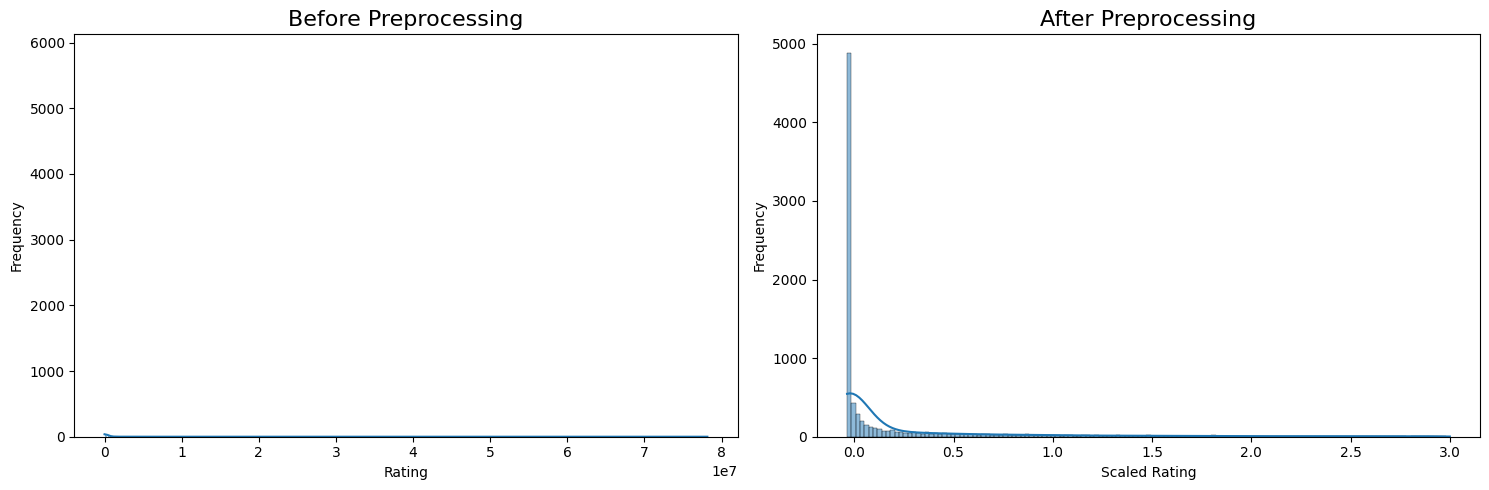

In [525]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the original histogram with KDE
sns.histplot(df["Reviews"], kde=True, ax=axes[0])
axes[0].set_title("Before Preprocessing", size=16)
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Frequency")

# Remove outliers and apply Robust scaling
scaler = RobustScaler()
df["Rating_scaled"] = scaler.fit_transform(df[["Reviews"]])
df_processed = df[(df["Rating_scaled"] >= -3) & (df["Rating_scaled"] <= 3)]

# Plot the histogram with KDE after preprocessing
sns.histplot(df_processed["Rating_scaled"], kde=True, ax=axes[1])
axes[1].set_title("After Preprocessing", size=16)
axes[1].set_xlabel("Scaled Rating")
axes[1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#**Genres Column**

In [ ]:
df["Genres"] = df["Genres"].str.split(";").str[0]

In [ ]:
df["Genres"].unique()

#Last Updated Column

In [ ]:
df["Last_Updated"] = pd.to_datetime(df["Last_Updated"])


In [ ]:
df["Last_Updated"]

In [ ]:
df.dtypes

# Validation

In [ ]:
!pip install pandera
import pandera as pa
import pandas as pd
from pandera import Column, DataFrameSchema, Check, Index

In [ ]:
from numpy import float64

schema = pa.DataFrameSchema(
    {
        "Installs": Column(int),
        "Price": Column(float,Check.in_range(0, 500)),  #assuption
    },
    # unique=["Id"],
)

validated_df = schema(df)
print(validated_df)

In [ ]:
try:
    schema.validate(df, lazy=True)
except pa.errors.SchemaErrors as exc:
    failure_cases_df = exc.failure_cases
    display(exc.failure_cases)

In [ ]:
!pip install pandera[io]

import pandera as pa
from pandera import Column, DataFrameSchema, Check, Index
inferred_schema = pa.infer_schema(df).to_script()


In [ ]:
print(inferred_schema)

#Using Great Expectation


In [ ]:
!pip install great_expectations
import great_expectations as gx


In [ ]:
context = gx.get_context()


In [ ]:
validator = context.sources.pandas_default.read_csv("/content/googleplaystore.csv")

In [ ]:
validator.expect_column_values_to_not_be_null('Category')

In [ ]:
df.head()

#Privacy Policy

In [ ]:
from cryptography.fernet import Fernet
import pandas as pd
key = Fernet.generate_key()

cipher = Fernet(key)

columns_to_encrypt = ['Size', 'Price', 'Last Updated']

for column in columns_to_encrypt:
    df[column] = df[column].apply(lambda x: cipher.encrypt(str(x).encode()).decode())

df.to_csv('encrypted_data.csv', index=False)

In [ ]:
df